# Howto classify articles with scikit-learn : 2

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import matplotlib
# Enable inline plotting
%matplotlib inline
filename = r'linuxfr_complete.csv'
lf_data = pd.read_csv(filename, encoding="UTF-8", sep='£', engine='python', quotechar='µ')
# Correction of the order for the matrix
lf_data.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>title</th>
      <th>author</th>
      <th>url</th>
      <th>score</th>
      <th>content</th>
      <th>quality_content</th>
      <th>count</th>
      <th>datetime</th>
      <th>author_url</th>
      <th>author_previous_scores</th>
      <th>birthday</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Endurance des SSD\n\n</td>
      <td>VoixOff</td>
      <td>/users/voixoff/journaux/endurance-des-ssd</td>
      <td>9.0</td>
      <td>Bonjour la foule\n\n_Yet another bookmark jour...</td>
      <td>Average Troll</td>
      <td>865</td>
      <td>2017-05-28T14:59:46+02:00</td>
      <td>https://linuxfr.org/users/voixoff</td>
      <td>[9.0, -15.0, 12.0, 0.0]</td>
      <td>28/08/2004</td>
    </tr>
    <tr>
      <th>1</th>
      <td>An unexpected Linux : reverse engineering\n\n</td>
      <td>Pinaraf</td>
      <td>/users/pied/journaux/an-unexpected-linux-rever...</td>
      <td>45.0</td>
      <td>## Sommaire\n\n  * 0) Bonjour archive, qui es-...</td>
      <td>Quality Troll</td>
      <td>8576</td>
      <td>2017-05-28T11:57:04+02:00</td>
      <td>https://linuxfr.org/users/pied</td>
      <td>[45.0, 53.0, 11.0, 44.0, 30.0, 64.0, 80.0, 18....</td>
      <td>22/04/2003</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Lecteur et exploitation de traces GPS en navig...</td>
      <td>Funix</td>
      <td>/users/funix/journaux/lecteur-et-exploitation-...</td>
      <td>18.0</td>
      <td>'nal\n\nCe journal s'adresse aux voileux, kite...</td>
      <td>Average Troll</td>
      <td>4102</td>
      <td>2017-05-28T10:24:57+02:00</td>
      <td>https://linuxfr.org/users/funix</td>
      <td>[18.0, 23.0, 15.0, 30.0, 35.0, 41.0, 32.0, 10....</td>
      <td>14/02/2004</td>
    </tr>
    <tr>
      <th>3</th>
      <td>[Quantique] La ligne des 49 qubits\n\n</td>
      <td>xunfr</td>
      <td>/users/xunfr/journaux/quantique-la-ligne-des-4...</td>
      <td>18.0</td>
      <td>Salutations,\n\nJe ne pense pas avoir lu un jo...</td>
      <td>Average Troll</td>
      <td>2602</td>
      <td>2017-05-27T16:18:10+02:00</td>
      <td>https://linuxfr.org/users/xunfr</td>
      <td>[18.0, 17.0, 35.0, 26.0, 23.0, 13.0, 15.0, 11....</td>
      <td>22/10/2012</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Et si l'open hardware démocratisait l'usage d'...</td>
      <td>vejmarie</td>
      <td>/users/vejmarie/journaux/et-si-l-open-hardware...</td>
      <td>31.0</td>
      <td>Bonjour à tous,\n\nCe journal est la v2 d'un p...</td>
      <td>Quality Troll</td>
      <td>8691</td>
      <td>2017-05-26T22:12:47+02:00</td>
      <td>https://linuxfr.org/users/vejmarie</td>
      <td>[31.0, 34.0, 37.0, 38.0, 35.0, 19.0, 14.0, 75....</td>
      <td>10/05/2009</td>
    </tr>
  </tbody>
</table>
</div>

In [4]:
targets_names = ['Average Troll', 'Great Troll',  'Magnificient Troll', 'Quality Troll']
targets=lf_data.quality_content
#del lf_data['count']
print("There are {} diaries in the dataframe.".format(len(lf_data)))
lf_data.dtypes

There are 5955 diaries in the dataframe.


title                      object
author                     object
url                        object
score                     float64
content                    object
quality_content            object
count                       int64
datetime                   object
author_url                 object
author_previous_scores     object
birthday                   object
dtype: object

In [5]:
lf_data['birthday'] = pd.to_datetime(lf_data['birthday'], infer_datetime_format=False)
lf_data['birthday'].head()

0   2004-08-28
1   2003-04-22
2   2004-02-14
3   2012-10-22
4   2009-10-05
Name: birthday, dtype: datetime64[ns]

In [6]:
lf_data['datetime'] = pd.to_datetime(lf_data['datetime'], infer_datetime_format=False)
lf_data['datetime'].head()

0   2017-05-28 12:59:46
1   2017-05-28 09:57:04
2   2017-05-28 08:24:57
3   2017-05-27 14:18:10
4   2017-05-26 20:12:47
Name: datetime, dtype: datetime64[ns]

# Score time serie

In [7]:
lf_data['score'].head()

0     9.0
1    45.0
2    18.0
3    18.0
4    31.0
Name: score, dtype: float64

In [8]:
score_df = lf_data[['datetime', 'score']].copy()
score_df.index = score_df['datetime']
del score_df['datetime']
score_df.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score</th>
    </tr>
    <tr>
      <th>datetime</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2017-05-28 12:59:46</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>2017-05-28 09:57:04</th>
      <td>45.0</td>
    </tr>
    <tr>
      <th>2017-05-28 08:24:57</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>2017-05-27 14:18:10</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>2017-05-26 20:12:47</th>
      <td>31.0</td>
    </tr>
  </tbody>
</table>
</div>

# Feature selection

One parameter (vectorization) is not enought. The new script allow to obtaine several parameters: (datetime, birthday, previous scores). Which one is relevant to predict the score? Feature selection can  help us.

## Adding new features

### Age
New accounts are often posting bad articles. If the account has less than a few days, there are great chance that it will post shitty content.

In [9]:
type(score_df)

pandas.core.frame.DataFrame

In [10]:
score_df['2001']

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score</th>
    </tr>
    <tr>
      <th>datetime</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
  </tbody>
</table>
</div>

(array([ 734503.,  734869.,  735234.,  735599.,  735964.,  736330.]),
 <a list of 6 Text xticklabel objects>)

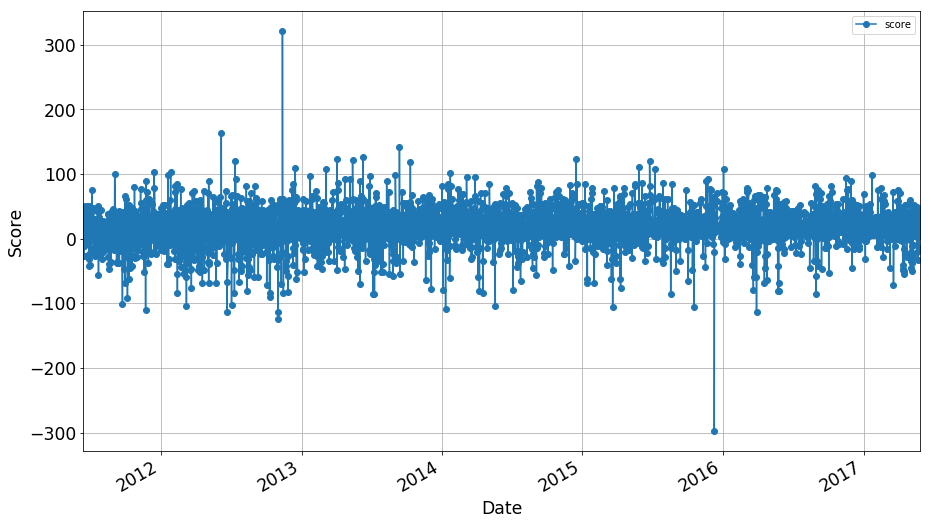

In [11]:
ax = score_df.plot(marker='o', grid=True, figsize=(15,9))
plt.ylabel('Score', fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.xlabel('Date', fontsize='xx-large')
plt.xticks(fontsize='xx-large')
#ax.set_ylim(-150,250)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

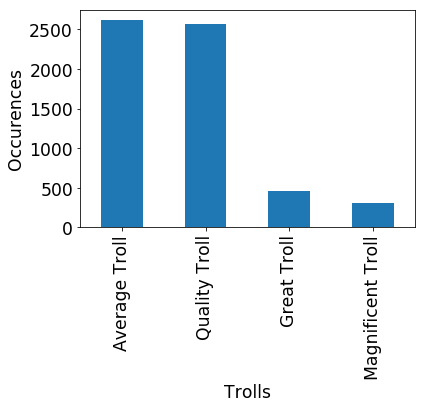

In [12]:
lf_data.quality_content.value_counts().plot(kind='bar')
plt.ylabel('Occurences', fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.xlabel('Trolls', fontsize='xx-large')
plt.xticks(fontsize='xx-large')

In [13]:
lf_data.quality_content.value_counts()

Average Troll        2617
Quality Troll        2565
Great Troll           463
Magnificent Troll     310
Name: quality_content, dtype: int64

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(4, 4))

# Feature selection

One parameter (vectorization) is not enought. The new script allow to obtaine several parameters: (datetime, birthday, previous scores). Which one is relevant to predict the score? Feature selection can  help us.

## Adding new features

### Age
New accounts are often posting bad articles. If the account has less than a few days, there are great chance that it will post shitty content.

In [15]:
lf_data['age'] = lf_data['datetime']-lf_data['birthday']
lf_data['newbie'] = False
lf_data.dtypes

title                              object
author                             object
url                                object
score                             float64
content                            object
quality_content                    object
count                               int64
datetime                   datetime64[ns]
author_url                         object
author_previous_scores             object
birthday                   datetime64[ns]
age                       timedelta64[ns]
newbie                               bool
dtype: object

In [16]:
lf_data['age'].head()

0   4656 days 12:59:46
1   5150 days 09:57:04
2   4852 days 08:24:57
3   1678 days 14:18:10
4   2790 days 20:12:47
Name: age, dtype: timedelta64[ns]

In [17]:
for index, line in lf_data.iterrows():
    # Problem: sometimes, age << 0
    if line['age'] < pd.Timedelta("0 day"):
            line['age'] = - line['age']        
    if line['age'] < pd.Timedelta("1 day"):
        lf_data.set_value(index, 'newbie', True)
        s = line['score']
        n = line['newbie']
        a = line['author']
        age = line['age']
        if s > 0:
            print("Auteur: {} | Score: {} | Newbie: {} | age : {}".format(a, s, n,  age))

Auteur: guanglier | Score: 10.0 | Newbie: False | age : 0 days 07:43:20
Auteur: coquelicot-bleu | Score: 31.0 | Newbie: False | age : 0 days 16:11:28
Auteur: alb | Score: 2.0 | Newbie: False | age : 0 days 20:57:44
Auteur: jrouquie | Score: 16.0 | Newbie: False | age : 0 days 21:08:33
Auteur: soohwa | Score: 21.0 | Newbie: False | age : 0 days 00:13:24
Auteur: bsc | Score: 26.0 | Newbie: False | age : 0 days 22:30:35
Auteur: matutine | Score: 24.0 | Newbie: False | age : 0 days 13:31:53
Auteur: nahoj | Score: 16.0 | Newbie: False | age : 0 days 14:14:58
Auteur: nalara | Score: 17.0 | Newbie: False | age : 0 days 01:14:40
Auteur: Nokto | Score: 11.0 | Newbie: False | age : 0 days 09:55:23
Auteur: mikael.desharnais | Score: 17.0 | Newbie: False | age : 0 days 16:18:26
Auteur: Adrianne96 | Score: 77.0 | Newbie: False | age : 0 days 14:46:01


Auteur: binoyte | Score: 27.0 | Newbie: False | age : 0 days 12:07:09
Auteur: Lee_lolcat | Score: 78.0 | Newbie: False | age : 0 days 20:16:34
Auteur: YvanM | Score: 19.0 | Newbie: False | age : 0 days 14:39:23
Auteur: albang | Score: 43.0 | Newbie: False | age : 0 days 11:39:57
Auteur: Charly | Score: 55.0 | Newbie: False | age : 0 days 13:35:47
Auteur: guaria | Score: 11.0 | Newbie: False | age : 0 days 15:58:35
Auteur: openwideINGENIERIE | Score: 9.0 | Newbie: False | age : 0 days 09:33:32
Auteur: ceciestuncompte | Score: 30.0 | Newbie: False | age : 0 days 13:30:40
Auteur: Joack | Score: 17.0 | Newbie: False | age : 0 days 11:52:25
Auteur: Thuban | Score: 47.0 | Newbie: False | age : 0 days 17:47:48
Auteur: plop_plop_sys | Score: 95.0 | Newbie: False | age : 0 days 11:10:39
Auteur: pitonPatate | Score: 36.0 | Newbie: False | age : 0 days 09:50:48


Auteur: BLepers | Score: 31.0 | Newbie: False | age : 0 days 11:07:35
Auteur: nib | Score: 15.0 | Newbie: False | age : 0 days 18:20:11
Auteur: palopap | Score: 30.0 | Newbie: False | age : 0 days 20:14:56
Auteur: mario_26 | Score: 20.0 | Newbie: False | age : 0 days 23:11:27
Auteur: denxp | Score: 33.0 | Newbie: False | age : 0 days 19:22:15
Auteur: sylvain | Score: 11.0 | Newbie: False | age : 0 days 15:23:07
Auteur: Nicolas49 | Score: 6.0 | Newbie: False | age : 0 days 19:33:54
Auteur: jeekajoo | Score: 7.0 | Newbie: False | age : 0 days 12:47:37
Auteur: neven | Score: 14.0 | Newbie: False | age : 0 days 17:00:42
Auteur: tim_au_tea | Score: 25.0 | Newbie: False | age : 0 days 09:01:14
Auteur: christophe_g | Score: 109.0 | Newbie: False | age : 0 days 17:28:35
Auteur: lapapla | Score: 54.0 | Newbie: False | age : 0 days 10:32:54
Auteur: xunfr | Score: 21.0 | Newbie: False | age : 0 days 13:24:36
Auteur: tagadala | Score: 4.0 | Newbie: False | age : 0 days 15:17:36
Auteur: fredoule2k 


Auteur: nbenm | Score: 6.0 | Newbie: False | age : 0 days 14:41:46
Auteur: john_john | Score: 10.0 | Newbie: False | age : 0 days 15:11:26
Auteur: merlin | Score: 18.0 | Newbie: False | age : 0 days 08:05:18
Auteur: jdbonjour | Score: 19.0 | Newbie: False | age : 0 days 09:40:55
Auteur: zvin | Score: 24.0 | Newbie: False | age : 0 days 10:03:38
Auteur: poncin.matthieu | Score: 21.0 | Newbie: False | age : 0 days 16:21:06
Auteur: hacker91 | Score: 11.0 | Newbie: False | age : 0 days 16:54:56
Auteur: 261f030600e9 | Score: 23.0 | Newbie: False | age : 0 days 14:50:17
Auteur: alsaln | Score: 28.0 | Newbie: False | age : 0 days 09:44:51
Auteur: ThibG | Score: 19.0 | Newbie: False | age : 0 days 10:35:10
Auteur: trolleurPro | Score: 74.0 | Newbie: False | age : 0 days 19:38:07
Auteur: Günther Freimann | Score: 47.0 | Newbie: False | age : 0 days 15:13:41
Auteur: nickel | Score: 15.0 | Newbie: False | age : 0 days 16:56:30
Auteur: damien | Score: 2.0 | Newbie: False | age : 0 days 00:18:23
A

Auteur: domledom | Score: 15.0 | Newbie: False | age : 0 days 06:16:50
Auteur: assr | Score: 20.0 | Newbie: False | age : 0 days 14:55:16


## Newbies don't always write shitty content

**BUT** select 1 days old account can help to obtain balanced data

Quality Troll        30
Average Troll        29
Magnificent Troll    27
Great Troll          11
Name: quality_content, dtype: int64

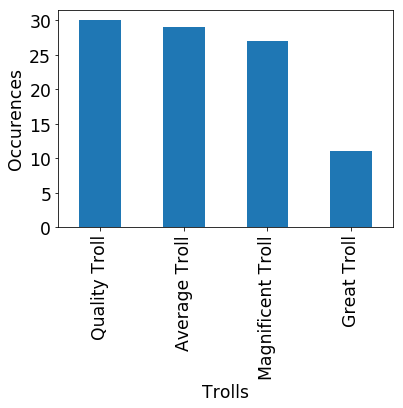

In [18]:
noob = lf_data.loc[lf_data['newbie'] == True]
noob.quality_content.value_counts().plot(kind='bar')
plt.ylabel('Occurences', fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.xlabel('Trolls', fontsize='xx-large')
plt.xticks(fontsize='xx-large')
noob.quality_content.value_counts()

### Previous scores

The previous scores of an author are stored in th following column:

In [19]:
lf_data['author_previous_scores'].head()
#lf_data.dtypes

0                              [9.0, -15.0, 12.0, 0.0]
1    [45.0, 53.0, 11.0, 44.0, 30.0, 64.0, 80.0, 18....
2    [18.0, 23.0, 15.0, 30.0, 35.0, 41.0, 32.0, 10....
3    [18.0, 17.0, 35.0, 26.0, 23.0, 13.0, 15.0, 11....
4    [31.0, 34.0, 37.0, 38.0, 35.0, 19.0, 14.0, 75....
Name: author_previous_scores, dtype: object

In [20]:
lf_data['median_score'] = 0
lf_data['average_score'] = 0

In [21]:
import statistics
for index, line in lf_data.iterrows():
        ps = line['author_previous_scores']
        #print(ps)
        ps = ps.replace("[",'')
        ps = ps.replace("]",'')
        ps = ps.replace(",",'')
        ps = ps.split()
        ps = [float(x) for x in ps]
        median = statistics.median(ps)
        try:
            avg = statistics.mean(ps)
        except TypeError:
            avg = np.NaN
        lf_data.set_value(index, 'median_score', median)
        lf_data.set_value(index, 'average_score', avg)
        #if abs(median - avg) > 2: 
        #    print("median: {} | Avg: {}| Scores : {}".format(median, avg, ps))

## Building new dataframe with the features

 * score
 * quality_content
 * age
 * average
 * content
 * newbie

## Building dict

In [22]:
lf_data['num_data'] = 0
lf_data['num_data'].head()

0    0
1    0
2    0
3    0
4    0
Name: num_data, dtype: int64

In [23]:
for index, line in lf_data.iterrows():
        score = line['score']
        newbie = line['newbie']
        avg = line['average_score']
        count = line['count']
        aggregate = {'score': score, 'newbie': newbie, 'average': avg, 'count':count}
        #lf_data.set_value(index, 'num_data', aggregate)

In [24]:
lf_data['num_data'].head()

0    0
1    0
2    0
3    0
4    0
Name: num_data, dtype: int64

In [25]:
lf = lf_data[['score', 'newbie', 'average_score', 'count', 'content', 'author']].copy()
target = lf_data[['quality_content']].copy()

In [26]:
lf_data['num_data'].head()

0    0
1    0
2    0
3    0
4    0
Name: num_data, dtype: int64

## Feature union

[Feature union](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html)

In [27]:
lf.dtypes

score            float64
newbie              bool
average_score      int64
count              int64
content           object
author            object
dtype: object

# Feature selection

In [28]:
# From  http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_footer
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_quoting
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.

    The data is expected to be stored in a 2D data structure, where the first
    index is over features and the second is over samples.  i.e.

    >> len(data[key]) == n_samples

    Please note that this is the opposite convention to scikit-learn feature
    matrixes (where the first index corresponds to sample).

    ItemSelector only requires that the collection implement getitem
    (data[key]).  Examples include: a dict of lists, 2D numpy array, Pandas
    DataFrame, numpy record array, etc.

    >> data = {'a': [1, 5, 2, 5, 2, 8],
               'b': [9, 4, 1, 4, 1, 3]}
    >> ds = ItemSelector(key='a')
    >> data['a'] == ds.transform(data)

    ItemSelector is not designed to handle data grouped by sample.  (e.g. a
    list of dicts).  If your data is structured this way, consider a
    transformer along the lines of `sklearn.feature_extraction.DictVectorizer`.

    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

class MultipleItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys):
        self.keys = keys

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.keys]


pipeline = Pipeline([
    # Extract the subject & body
    #('subjectbody', DataExtractor()),

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the post's subject line
            ('author', Pipeline([
                ('selector', MultipleItemSelector(keys='author')),
                ('tfidf', TfidfVectorizer(min_df=50)),
            ])),

            # Pipeline for standard bag-of-words model for body
            ('content', Pipeline([
                ('selector', MultipleItemSelector(keys='content')),
                ('vectorizer', CountVectorizer()), 
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
            ])),

            # Pipeline dealing with numerical values stored in a dict
            ('num_values', Pipeline([
                ('selector', MultipleItemSelector(keys=['score', 'newbie', 'average_score', 'count']))
                ,  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'author': 1.0,      # 0.8
            'content': 1.0,     # 0.5
            'num_values': 1.0,  # 1.0
        },
    )),

    # Use a SVC classifier on the combined features
    #('svc', SVC(kernel='rbf')),
    ('svc', SVC(kernel='linear')),  # KO
    #('svc', LinearSVC()),
    #('clf', GaussianNB()),
    #('svc', SGDClassifier()),
    
])

In [28]:
pipeline.fit(lf, target.values.ravel())

AttributeError: lower not found

In [ ]:
from sklearn.externals import joblib
#pipeline = joblib.load('linuxfr_pipeline.pkl')

## Testing with cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         lf,  # training data
                         target.values.ravel(),  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         #scoring='accuracy',  # which scoring metric?
                         scoring='f1_weighted',
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)
print('Total diaries classified:', len(lf_data))
print('Score:', sum(scores)/len(scores))

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/usr/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7f94ab043540, file "/...3.6/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/lib/python3.6/site-packages/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/usr/lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/lib/python3.6/site-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f94ab043540, file "/...3.6/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/lib/python3.6/site-packages/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/usr/lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/lib/python3.6/site-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/usr/lib/python3.6/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/usr/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/usr/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/usr/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/usr/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': False, 'code': "from sklearn.model_selection import cross_val_sc...f_data))\nprint('Score:', sum(scores)/len(scores))", 'output_type': '', 'silent': False, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 6, 9, 19, 28, 41, 890276, tzinfo=tzutc()), 'msg_id': '61dd350b-fa0d-411a-976c-fe6f1205db41', 'msg_type': 'execute_request', 'session': '45eef64c-5f48-4c0b-b7fe-c6f67216b832', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '61dd350b-fa0d-411a-976c-fe6f1205db41', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'226f48bf-3550ed748b6efd5bb4e11292']
        msg = {'buffers': [], 'content': {'allow_stdin': False, 'code': "from sklearn.model_selection import cross_val_sc...f_data))\nprint('Score:', sum(scores)/len(scores))", 'output_type': '', 'silent': False, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 6, 9, 19, 28, 41, 890276, tzinfo=tzutc()), 'msg_id': '61dd350b-fa0d-411a-976c-fe6f1205db41', 'msg_type': 'execute_request', 'session': '45eef64c-5f48-4c0b-b7fe-c6f67216b832', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '61dd350b-fa0d-411a-976c-fe6f1205db41', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'226f48bf-3550ed748b6efd5bb4e11292'], parent={'buffers': [], 'content': {'allow_stdin': False, 'code': "from sklearn.model_selection import cross_val_sc...f_data))\nprint('Score:', sum(scores)/len(scores))", 'output_type': '', 'silent': False, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 6, 9, 19, 28, 41, 890276, tzinfo=tzutc()), 'msg_id': '61dd350b-fa0d-411a-976c-fe6f1205db41', 'msg_type': 'execute_request', 'session': '45eef64c-5f48-4c0b-b7fe-c6f67216b832', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '61dd350b-fa0d-411a-976c-fe6f1205db41', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = False
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/usr/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="from sklearn.model_selection import cross_val_sc...f_data))\nprint('Score:', sum(scores)/len(scores))", silent=False, store_history=True, user_expressions={}, allow_stdin=False)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "from sklearn.model_selection import cross_val_sc...f_data))\nprint('Score:', sum(scores)/len(scores))"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/usr/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("from sklearn.model_selection import cross_val_sc...f_data))\nprint('Score:', sum(scores)/len(scores))",), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("from sklearn.model_selection import cross_val_sc...f_data))\nprint('Score:', sum(scores)/len(scores))",)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="from sklearn.model_selection import cross_val_sc...f_data))\nprint('Score:', sum(scores)/len(scores))", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-69-b6ed60a6f16d>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f945c02c320, executi..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f945fc66300, file "<ipython-input-69-b6ed60a6f16d>", line 2>
        result = <ExecutionResult object at 7f945c02c320, executi..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f945fc66300, file "<ipython-input-69-b6ed60a6f16d>", line 2>, result=<ExecutionResult object at 7f945c02c320, executi..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f945fc66300, file "<ipython-input-69-b6ed60a6f16d>", line 2>
        self.user_global_ns = {'BaseEstimator': <class 'sklearn.base.BaseEstimator'>, 'DictVectorizer': <class 'sklearn.feature_extraction.dict_vectorizer.DictVectorizer'>, 'FeatureUnion': <class 'sklearn.pipeline.FeatureUnion'>, 'In': ['', 'import matplotlib.pyplot as plt\nimport pandas as...ection of the order for the matrix\nlf_data.head()', 'import matplotlib.pyplot as plt\nimport pandas as...ection of the order for the matrix\nlf_data.head()', 'targets_names = [\'Average Troll\', \'Great Troll\',... dataframe.".format(len(lf_data)))\nlf_data.dtypes', "lf_data['birthday'] = pd.to_datetime(lf_data['bi...datetime_format=False)\nlf_data['birthday'].head()", "lf_data['datetime'] = pd.to_datetime(lf_data['da...datetime_format=False)\nlf_data['datetime'].head()", "lf_data['score'].head()", "score_df = lf_data[['datetime', 'score']].copy()...tetime']\ndel score_df['datetime']\nscore_df.head()", 'type(score_df)', "score_df['2001']", "ax = score_df.plot(marker='o', grid=True, figsiz...ticks(fontsize='xx-large')\n#ax.set_ylim(-150,250)", "lf_data.quality_content.value_counts().plot(kind...tsize='xx-large')\nplt.xticks(fontsize='xx-large')", 'lf_data.quality_content.value_counts()', "def plot_confusion_matrix(cm, classes,\n         ...'Predicted label')\n    plt.figure(figsize=(4, 4))", "lf_data['age'] = lf_data['datetime']-lf_data['birthday']\nlf_data['newbie'] = False\nlf_data.dtypes", "lf_data['age'].head()", 'for index, line in lf_data.iterrows():\n    # Pro...} | Newbie: {} | age : {}".format(a, s, n,  age))', "noob = lf_data.loc[lf_data['newbie'] == True]\nno...e='xx-large')\nnoob.quality_content.value_counts()", "lf_data['author_previous_scores'].head()\n#lf_data.dtypes", "lf_data['median_score'] = 0\nlf_data['average_score'] = 0", ...], 'ItemSelector': <class '__main__.ItemSelector'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'MultipleItemSelector': <class '__main__.MultipleItemSelector'>, 'Out': {1:                                                t...7.0, 38.0, 35.0, 19.0, 14.0, 75....  10/05/2009  , 2:                                                t...7.0, 38.0, 35.0, 19.0, 14.0, 75....  10/05/2009  , 3: title                      object
author        ...t
birthday                   object
dtype: object, 4: 0   2004-08-28
1   2003-04-22
2   2004-02-14
3  ... 2009-10-05
Name: birthday, dtype: datetime64[ns], 5: 0   2017-05-28 12:59:46
1   2017-05-28 09:57:04
...26 20:12:47
Name: datetime, dtype: datetime64[ns], 6: 0     9.0
1    45.0
2    18.0
3    18.0
4    31.0
Name: score, dtype: float64, 7:                      score
datetime             ...-05-27 14:18:10   18.0
2017-05-26 20:12:47   31.0, 8: <class 'pandas.core.frame.DataFrame'>, 9: Empty DataFrame
Columns: [score]
Index: [], 10: (array([ 734503.,  734869.,  735234.,  735599.,  735964.,  736330.]), <a list of 6 Text xticklabel objects>), ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, ...}
        self.user_ns = {'BaseEstimator': <class 'sklearn.base.BaseEstimator'>, 'DictVectorizer': <class 'sklearn.feature_extraction.dict_vectorizer.DictVectorizer'>, 'FeatureUnion': <class 'sklearn.pipeline.FeatureUnion'>, 'In': ['', 'import matplotlib.pyplot as plt\nimport pandas as...ection of the order for the matrix\nlf_data.head()', 'import matplotlib.pyplot as plt\nimport pandas as...ection of the order for the matrix\nlf_data.head()', 'targets_names = [\'Average Troll\', \'Great Troll\',... dataframe.".format(len(lf_data)))\nlf_data.dtypes', "lf_data['birthday'] = pd.to_datetime(lf_data['bi...datetime_format=False)\nlf_data['birthday'].head()", "lf_data['datetime'] = pd.to_datetime(lf_data['da...datetime_format=False)\nlf_data['datetime'].head()", "lf_data['score'].head()", "score_df = lf_data[['datetime', 'score']].copy()...tetime']\ndel score_df['datetime']\nscore_df.head()", 'type(score_df)', "score_df['2001']", "ax = score_df.plot(marker='o', grid=True, figsiz...ticks(fontsize='xx-large')\n#ax.set_ylim(-150,250)", "lf_data.quality_content.value_counts().plot(kind...tsize='xx-large')\nplt.xticks(fontsize='xx-large')", 'lf_data.quality_content.value_counts()', "def plot_confusion_matrix(cm, classes,\n         ...'Predicted label')\n    plt.figure(figsize=(4, 4))", "lf_data['age'] = lf_data['datetime']-lf_data['birthday']\nlf_data['newbie'] = False\nlf_data.dtypes", "lf_data['age'].head()", 'for index, line in lf_data.iterrows():\n    # Pro...} | Newbie: {} | age : {}".format(a, s, n,  age))', "noob = lf_data.loc[lf_data['newbie'] == True]\nno...e='xx-large')\nnoob.quality_content.value_counts()", "lf_data['author_previous_scores'].head()\n#lf_data.dtypes", "lf_data['median_score'] = 0\nlf_data['average_score'] = 0", ...], 'ItemSelector': <class '__main__.ItemSelector'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'MultipleItemSelector': <class '__main__.MultipleItemSelector'>, 'Out': {1:                                                t...7.0, 38.0, 35.0, 19.0, 14.0, 75....  10/05/2009  , 2:                                                t...7.0, 38.0, 35.0, 19.0, 14.0, 75....  10/05/2009  , 3: title                      object
author        ...t
birthday                   object
dtype: object, 4: 0   2004-08-28
1   2003-04-22
2   2004-02-14
3  ... 2009-10-05
Name: birthday, dtype: datetime64[ns], 5: 0   2017-05-28 12:59:46
1   2017-05-28 09:57:04
...26 20:12:47
Name: datetime, dtype: datetime64[ns], 6: 0     9.0
1    45.0
2    18.0
3    18.0
4    31.0
Name: score, dtype: float64, 7:                      score
datetime             ...-05-27 14:18:10   18.0
2017-05-26 20:12:47   31.0, 8: <class 'pandas.core.frame.DataFrame'>, 9: Empty DataFrame
Columns: [score]
Index: [], 10: (array([ 734503.,  734869.,  735234.,  735599.,  735964.,  736330.]), <a list of 6 Text xticklabel objects>), ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/home/arnaud/files/programmation/python/scikit/linuxfr/<ipython-input-69-b6ed60a6f16d> in <module>()
      3                          lf,  # training data
      4                          target.values.ravel(),  # training labels
      5                          cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
      6                          #scoring='accuracy',  # which scoring metric?
      7                          scoring='f1_weighted',
----> 8                          n_jobs=-1,  # -1 = use all cores = faster
      9                          )
     10 print(scores)
     11 print('Total diaries classified:', len(lf_data))
     12 print('Score:', sum(scores)/len(scores))

...........................................................................
/usr/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_val_score(estimator=Pipeline(steps=[('union', FeatureUnion(n_jobs=1,...B(alpha=1.0, class_prior=None, fit_prior=True))]), X=      score  newbie  average_score  count  \
0  ...          Sytoka Modon  

[5955 rows x 6 columns], y=array(['Average Troll', 'Quality Troll', 'Averag...gnificent Troll', 'Quality Troll'], dtype=object), groups=None, scoring='f1_weighted', cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    135     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    136                         pre_dispatch=pre_dispatch)
    137     scores = parallel(delayed(_fit_and_score)(clone(estimator), X, y, scorer,
    138                                               train, test, verbose, None,
    139                                               fit_params)
--> 140                       for train, test in cv_iter)
        cv_iter = [(array([ 534,  535,  537, ..., 5952, 5953, 5954]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...55, 656, 659, 661, 662, 664, 665, 666, 667, 679])), (array([   0,    1,    2, ..., 5952, 5953, 5954]), array([ 534,  535,  537,  539,  540,  541,  542,...1388, 1397, 1405, 1442,
       1452, 1467, 1471])), (array([   0,    1,    2, ..., 5952, 5953, 5954]), array([1063, 1065, 1066, 1067, 1071, 1072, 1074,...2085, 2086, 2092, 2093,
       2095, 2110, 2147])), (array([   0,    1,    2, ..., 5952, 5953, 5954]), array([1595, 1598, 1599, 1601, 1602, 1604, 1605,...2817, 2852, 2857, 2877, 2887,
       2894, 2941])), (array([   0,    1,    2, ..., 5952, 5953, 5954]), array([2154, 2155, 2159, 2162, 2175, 2176, 2177,...3442, 3449, 3474, 3485, 3519,
       3520, 3523])), (array([   0,    1,    2, ..., 5952, 5953, 5954]), array([2675, 2678, 2679, 2680, 2683, 2684, 2693,...4035, 4039, 4047, 4054, 4065, 4074,
       4083])), (array([   0,    1,    2, ..., 5952, 5953, 5954]), array([3264, 3266, 3267, 3271, 3272, 3274, 3277,...4631, 4635, 4637, 4644, 4647, 4651,
       4654])), (array([   0,    1,    2, ..., 5952, 5953, 5954]), array([3876, 3878, 3881, 3886, 3889, 3895, 3897,... 5069, 5083, 5103, 5111, 5125, 5127, 5144, 5162])), (array([   0,    1,    2, ..., 5952, 5953, 5954]), array([4491, 4492, 4493, 4494, 4496, 4500, 4504,... 5505, 5513, 5538, 5545, 5563, 5565, 5568, 5574])), (array([   0,    1,    2, ..., 5565, 5568, 5574]), array([5222, 5223, 5226, 5231, 5233, 5235, 5238,... 5947, 5948, 5949, 5950, 5951, 5952, 5953, 5954]))]
    141     return np.array(scores)[:, 0]
    142 
    143 
    144 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/usr/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object cross_val_score.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Jun  9 21:28:58 2017
PID: 7043                                  Python 3.6.1: /usr/bin/python3.6
...........................................................................
/usr/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(steps=[('union', FeatureUnion(n_jobs=1,...B(alpha=1.0, class_prior=None, fit_prior=True))]),       score  newbie  average_score  count  \
0  ...          Sytoka Modon  

[5955 rows x 6 columns], array(['Average Troll', 'Quality Troll', 'Averag...gnificent Troll', 'Quality Troll'], dtype=object), make_scorer(f1_score, pos_label=None, average=weighted), array([ 534,  535,  537, ..., 5952, 5953, 5954]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...55, 656, 659, 661, 662, 664, 665, 666, 667, 679]), 0, None, None), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(steps=[('union', FeatureUnion(n_jobs=1,...B(alpha=1.0, class_prior=None, fit_prior=True))]),       score  newbie  average_score  count  \
0  ...          Sytoka Modon  

[5955 rows x 6 columns], array(['Average Troll', 'Quality Troll', 'Averag...gnificent Troll', 'Quality Troll'], dtype=object), make_scorer(f1_score, pos_label=None, average=weighted), array([ 534,  535,  537, ..., 5952, 5953, 5954]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...55, 656, 659, 661, 662, 664, 665, 666, 667, 679]), 0, None, None)
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(steps=[('union', FeatureUnion(n_jobs=1,...B(alpha=1.0, class_prior=None, fit_prior=True))]), X=      score  newbie  average_score  count  \
0  ...          Sytoka Modon  

[5955 rows x 6 columns], y=array(['Average Troll', 'Quality Troll', 'Averag...gnificent Troll', 'Quality Troll'], dtype=object), scorer=make_scorer(f1_score, pos_label=None, average=weighted), train=array([ 534,  535,  537, ..., 5952, 5953, 5954]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...55, 656, 659, 661, 662, 664, 665, 666, 667, 679]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    233 
    234     try:
    235         if y_train is None:
    236             estimator.fit(X_train, **fit_params)
    237         else:
--> 238             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(steps=[('...(alpha=1.0, class_prior=None, fit_prior=True))])>
        X_train =       score  newbie  average_score  count  \
534.....        Sytoka Modon  

[5358 rows x 6 columns]
        y_train = array(['Quality Troll', 'Quality Troll', 'Qualit...gnificent Troll', 'Quality Troll'], dtype=object)
        fit_params = {}
    239 
    240     except Exception as e:
    241         # Note fit time as time until error
    242         fit_time = time.time() - start_time

...........................................................................
/usr/lib/python3.6/site-packages/sklearn/pipeline.py in fit(self=Pipeline(steps=[('union', FeatureUnion(n_jobs=1,...B(alpha=1.0, class_prior=None, fit_prior=True))]), X=      score  newbie  average_score  count  \
534.....        Sytoka Modon  

[5358 rows x 6 columns], y=array(['Quality Troll', 'Quality Troll', 'Qualit...gnificent Troll', 'Quality Troll'], dtype=object), **fit_params={})
    265         self : Pipeline
    266             This estimator
    267         """
    268         Xt, fit_params = self._fit(X, y, **fit_params)
    269         if self._final_estimator is not None:
--> 270             self._final_estimator.fit(Xt, y, **fit_params)
        self._final_estimator.fit = <bound method BaseDiscreteNB.fit of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>
        Xt = <5358x69 sparse matrix of type '<class 'numpy.fl... stored elements in Compressed Sparse Row format>
        y = array(['Quality Troll', 'Quality Troll', 'Qualit...gnificent Troll', 'Quality Troll'], dtype=object)
        fit_params = {}
    271         return self
    272 
    273     def fit_transform(self, X, y=None, **fit_params):
    274         """Fit the model and transform with the final estimator

...........................................................................
/usr/lib/python3.6/site-packages/sklearn/naive_bayes.py in fit(self=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), X=<5358x69 sparse matrix of type '<class 'numpy.fl... stored elements in Compressed Sparse Row format>, y=array(['Quality Troll', 'Quality Troll', 'Qualit...gnificent Troll', 'Quality Troll'], dtype=object), sample_weight=None)
    582         # and feature log probas
    583         n_effective_classes = Y.shape[1]
    584         self.class_count_ = np.zeros(n_effective_classes, dtype=np.float64)
    585         self.feature_count_ = np.zeros((n_effective_classes, n_features),
    586                                        dtype=np.float64)
--> 587         self._count(X, Y)
        self._count = <bound method MultinomialNB._count of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>
        X = <5358x69 sparse matrix of type '<class 'numpy.fl... stored elements in Compressed Sparse Row format>
        Y = array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  ...0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])
    588         self._update_feature_log_prob()
    589         self._update_class_log_prior(class_prior=class_prior)
    590         return self
    591 

...........................................................................
/usr/lib/python3.6/site-packages/sklearn/naive_bayes.py in _count(self=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), X=<5358x69 sparse matrix of type '<class 'numpy.fl... stored elements in Compressed Sparse Row format>, Y=array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  ...0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]]))
    685         self.class_prior = class_prior
    686 
    687     def _count(self, X, Y):
    688         """Count and smooth feature occurrences."""
    689         if np.any((X.data if issparse(X) else X) < 0):
--> 690             raise ValueError("Input X must be non-negative")
    691         self.feature_count_ += safe_sparse_dot(Y.T, X)
    692         self.class_count_ += Y.sum(axis=0)
    693 
    694     def _update_feature_log_prob(self):

ValueError: Input X must be non-negative
___________________________________________________________________________

# Out of sample diaries

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

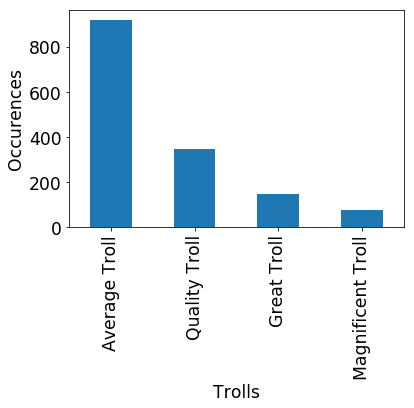

In [ ]:
filename = r'out_of_sample_complete.csv'
lf_out = pd.read_csv(filename, encoding="UTF-8", sep='£', engine='python', quotechar='µ')
lf_out.dtypes
lf_out = lf_out.reindex(np.random.permutation(lf_out.index))
lf_out.quality_content.value_counts().plot(kind='bar')
plt.ylabel('Occurences', fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.xlabel('Trolls', fontsize='xx-large')
plt.xticks(fontsize='xx-large')

In [ ]:
print("There are {} diaries in the dataframe.".format(len(lf_data)))

There are 5955 diaries in the dataframe.


In [ ]:
lf_out.quality_content.value_counts()

Average Troll        917
Quality Troll        346
Great Troll          145
Magnificent Troll     77
Name: quality_content, dtype: int64

In [ ]:
lf_out['birthday'] = pd.to_datetime(lf_out['birthday'], infer_datetime_format=False)
lf_out['datetime'] = pd.to_datetime(lf_out['datetime'], infer_datetime_format=False)

lf_out['age'] = lf_out['datetime']-lf_out['birthday']
lf_out['newbie'] = False

In [ ]:
score_out = lf_out[['datetime', 'score']].copy()
score_out.index = score_out['datetime']
del score_out['datetime']
score_df.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score</th>
    </tr>
    <tr>
      <th>datetime</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2017-05-28 12:59:46</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>2017-05-28 09:57:04</th>
      <td>45.0</td>
    </tr>
    <tr>
      <th>2017-05-28 08:24:57</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>2017-05-27 14:18:10</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>2017-05-26 20:12:47</th>
      <td>31.0</td>
    </tr>
  </tbody>
</table>
</div>

(array([ 733924.,  733985.,  734046.,  734107.,  734169.,  734228.,  734289.]),
 <a list of 7 Text xticklabel objects>)

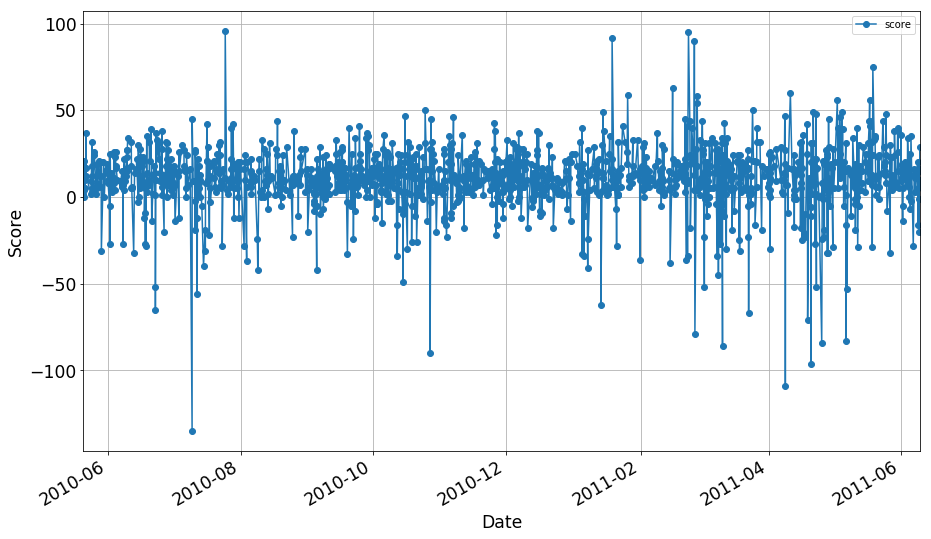

In [ ]:
ax = score_out.plot(marker='o', grid=True, figsize=(15,9))
plt.ylabel('Score', fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.xlabel('Date', fontsize='xx-large')
plt.xticks(fontsize='xx-large')
#ax.set_ylim(-150,250)

In [ ]:
for index, line in lf_out.iterrows():
    # Problem: sometimes, age << 0
    if line['age'] < pd.Timedelta("0 day"):
            line['age'] = - line['age']        
    if line['age'] < pd.Timedelta("1 day"):
        lf_out.set_value(index, 'newbie', True)
        s = line['score']
        n = line['newbie']
        a = line['author']
        age = line['age']
        if s > 0:
            print("Auteur: {} | Score: {} | Newbie: {} | age : {}".format(a, s, n,  age))

Auteur: Fuasgail | Score: 23.0 | Newbie: False | age : 0 days 12:32:23
Auteur: Demetro | Score: 18.0 | Newbie: False | age : 0 days 22:51:13
Auteur: Jocko | Score: 4.0 | Newbie: False | age : 0 days 16:10:33
Auteur: kusa | Score: 17.0 | Newbie: False | age : 0 days 17:47:52
Auteur: ecogex | Score: 4.0 | Newbie: False | age : 0 days 12:59:41
Auteur: Ryu | Score: 44.0 | Newbie: False | age : 0 days 17:52:45


In [ ]:
import statistics
for index, line in lf_out.iterrows():
        ps = line['author_previous_scores']
        #print(ps)
        ps = ps.replace("[",'')
        ps = ps.replace("]",'')
        ps = ps.replace(",",'')
        ps = ps.split()
        ps = [float(x) for x in ps]
        median = statistics.median(ps)
        try:
            avg = statistics.mean(ps)
        except TypeError:
            avg = np.NaN
        lf_out.set_value(index, 'median_score', median)
        lf_out.set_value(index, 'average_score', avg)

In [ ]:
X_out = lf_out[['score', 'newbie', 'average_score', 'count', 'content', 'author']].copy()
Y_out = lf_out[['quality_content']].copy()

In [ ]:
#pipeline.fit(lf, target.values.ravel())

In [ ]:
from sklearn.externals import joblib
joblib.dump(pipeline, 'linuxfr_pipeline.pkl')

['linuxfr_pipeline.pkl']

Diaries: 1485
Score: 0.587319265468
Confusion matrix, without normalization
[[757  50   0 110]
 [ 97  35   3  10]
 [ 52  16   5   4]
 [218   6   0 122]]


Normalized confusion matrix
[[ 0.83  0.05  0.    0.12]
 [ 0.67  0.24  0.02  0.07]
 [ 0.68  0.21  0.06  0.05]
 [ 0.63  0.02  0.    0.35]]


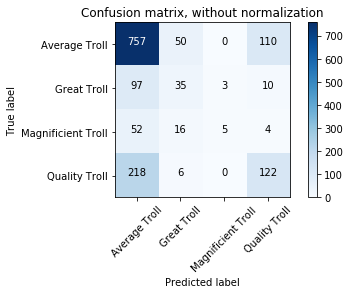

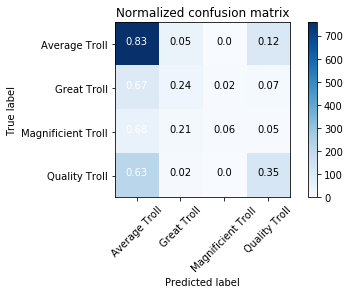

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,precision_score
import itertools
predicted_out = pipeline.predict(X_out)
#np.mean(predicted_out == Y_out)
score_out = f1_score(Y_out, predicted_out, average='weighted')
print('Diaries:', len(lf_out))
print('Score:', score_out)
cnf_matrix_out = confusion_matrix(Y_out, predicted_out)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_out, classes=targets_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_out, classes=targets_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
lf_out.quality_content.value_counts()

Average Troll        917
Quality Troll        346
Great Troll          145
Magnificent Troll     77
Name: quality_content, dtype: int64

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_out, predicted_out, target_names=targets_names))

                    precision    recall  f1-score   support

     Average Troll       0.67      0.83      0.74       917
       Great Troll       0.33      0.24      0.28       145
Magnificient Troll       0.62      0.06      0.12        77
     Quality Troll       0.50      0.35      0.41       346

       avg / total       0.60      0.62      0.59      1485



# Make dummy predictions

In [ ]:
training_journals = ['Sécuriser son serveur avec la commande sudo rm -rf /*', 
                     'Debian is dying', 
                     'Windows Millenium est meilleur que Linux sur calculatrice graphique',
                     "MultiDeskOS est 42% plus performant que Redhat 3.0.3 (Picasso)",
                     "Pierre Tramo président !",
                     "Des chocolatines au menu des cantines situées dans les DOM-TOM", 
                     "1515, l’année du Desktop Linux!", 
                     "DEPECHE"]

In [ ]:
with open("journal/journal.md") as f:
    depeche = f.read()
training_journals[7]=depeche
#training_journals

In [ ]:
ar = np.array(training_journals)
#dummy_test = pd.DataFrame(ar, index = ['a1', 'a2', 'a3', 'a4',  'a5', 'a6', 'a7'], columns = ['content'])
d = {'content': ar }
dummy_test = pd.DataFrame(data=d, index = ['a1', 'a2', 'a3', 'a4',  'a5', 'a6', 'a7', 'a8'])
dummy_test['author'] = 'jnanar--2'
dummy_test['average_score'] = 71.0
dummy_test['count'] = 0
for index, line in dummy_test.iterrows():
    dummy_test.set_value(index, 'count', len(line['content']))
dummy_test['score'] = 0.0
dummy_test['newbie'] = False

In [ ]:
dummy_test.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>content</th>
      <th>author</th>
      <th>average_score</th>
      <th>count</th>
      <th>score</th>
      <th>newbie</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>a1</th>
      <td>Sécuriser son serveur avec la commande sudo rm...</td>
      <td>jnanar--2</td>
      <td>71.0</td>
      <td>53</td>
      <td>0.0</td>
      <td>False</td>
    </tr>
    <tr>
      <th>a2</th>
      <td>Debian is dying</td>
      <td>jnanar--2</td>
      <td>71.0</td>
      <td>15</td>
      <td>0.0</td>
      <td>False</td>
    </tr>
    <tr>
      <th>a3</th>
      <td>Windows Millenium est meilleur que Linux sur c...</td>
      <td>jnanar--2</td>
      <td>71.0</td>
      <td>67</td>
      <td>0.0</td>
      <td>False</td>
    </tr>
    <tr>
      <th>a4</th>
      <td>MultiDeskOS est 42% plus performant que Redhat...</td>
      <td>jnanar--2</td>
      <td>71.0</td>
      <td>62</td>
      <td>0.0</td>
      <td>False</td>
    </tr>
    <tr>
      <th>a5</th>
      <td>Pierre Tramo président !</td>
      <td>jnanar--2</td>
      <td>71.0</td>
      <td>24</td>
      <td>0.0</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
dummy_prediction = pipeline.predict(dummy_test)
#print(dummy_prediction)
for doc, category in zip(training_journals, dummy_prediction):
    print('%r => %s' % (doc, category))

'Sécuriser son serveur avec la commande sudo rm -rf /*' => Quality Troll
'Debian is dying' => Quality Troll
'Windows Millenium est meilleur que Linux sur calculatrice graphique' => Quality Troll
'MultiDeskOS est 42% plus performant que Redhat 3.0.3 (Picasso)' => Quality Troll
'Pierre Tramo président !' => Quality Troll
'Des chocolatines au menu des cantines situées dans les DOM-TOM' => Quality Troll
'1515, l’année du Desktop Linux!' => Quality Troll
'Cette dépêche traite de l\'exploration de données sur des données issues de LinuxFr.org.\n\n\n\nAyant découvert récemment [scikit-learn](https://fr.wikipedia.org/wiki/Scikit-learn), une bibliothèque Python d\'apprentissage statistique (machine learning). Je voulais partager ici un début d\'analyse sur des contenus issus de LinuxFR.\n\n\n\n**Avertissement : je ne suis pas programmeur, ni statisticien. Je ne maîtrise pas encore tous les arcanes de scikit-learn et de nombreux éléments théoriques m\'échappent encore. Je pense néanmoins que les

In [ ]:
#dummy_proba = pipeline.predict_proba(dummy_test)
#print(dummy_proba)

# Feature selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
lf = lf_data[['score', 'newbie', 'average_score', 'count', 'content', 'author']].copy()
target = lf_data[['quality_content']].copy()
lf.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score</th>
      <th>newbie</th>
      <th>average_score</th>
      <th>count</th>
      <th>content</th>
      <th>author</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>9.0</td>
      <td>False</td>
      <td>1</td>
      <td>865</td>
      <td>Bonjour la foule\n\n_Yet another bookmark jour...</td>
      <td>VoixOff</td>
    </tr>
    <tr>
      <th>1</th>
      <td>45.0</td>
      <td>False</td>
      <td>39</td>
      <td>8576</td>
      <td>## Sommaire\n\n  * 0) Bonjour archive, qui es-...</td>
      <td>Pinaraf</td>
    </tr>
    <tr>
      <th>2</th>
      <td>18.0</td>
      <td>False</td>
      <td>13</td>
      <td>4102</td>
      <td>'nal\n\nCe journal s'adresse aux voileux, kite...</td>
      <td>Funix</td>
    </tr>
    <tr>
      <th>3</th>
      <td>18.0</td>
      <td>False</td>
      <td>19</td>
      <td>2602</td>
      <td>Salutations,\n\nJe ne pense pas avoir lu un jo...</td>
      <td>xunfr</td>
    </tr>
    <tr>
      <th>4</th>
      <td>31.0</td>
      <td>False</td>
      <td>34</td>
      <td>8691</td>
      <td>Bonjour à tous,\n\nCe journal est la v2 d'un p...</td>
      <td>vejmarie</td>
    </tr>
  </tbody>
</table>
</div>

# Variance Threshold

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by

$Var[X] = p(1-p)$

where p = probability that a feature have the same value in all samples.

In [ ]:
p =  0.85
X = lf_data[['score', 'newbie', 'average_score', 'count']].copy()
treshold = p*(1-p)
#treshold = 0
sel = VarianceThreshold(threshold=0)

In [ ]:
X_fit = sel.fit_transform(X)

In [ ]:
X_fit.shape

(5955, 4)

In [ ]:
X.as_matrix().shape

(5955, 4)

In [ ]:
from sklearn.feature_selection import SelectKBest
X_new = SelectKBest(k=4).fit_transform(X, target.values.ravel())
X_new.shape

(5955, 4)